In [1]:
# Perform clustering (hierarchical,K means clustering and DBSCAN) for
# airlines data to obtain optimum number of clusters
# Draw the inferences from the clusters obtained

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
data=pd.read_csv('EastWestAirlines.csv')

In [6]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data.shape

(3999, 12)

In [8]:
data.info()     # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data[data.duplicated()]    # no duplicates

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [10]:
# Normalizing data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
airlines= norm_func(data.iloc[:,1:])
airlines.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


## Hierarchical Clustering

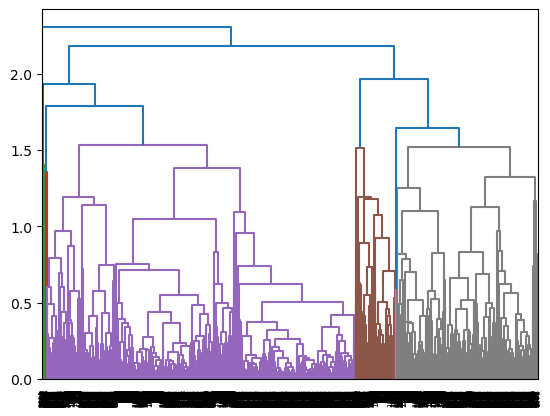

In [12]:
# creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(airlines,method='complete'))

In [13]:
# creating clusters
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [14]:
hc.fit(airlines)    # fitting

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [15]:
y_hc=hc.fit_predict(airlines)    # predicting

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
data['hc_clusterid']=y_hc         # adding new column in dataset
data.head(6)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0


In [19]:
data1=data.sort_values('hc_clusterid')    # sorting values

In [20]:
data1.iloc[:,[0,12]]

,ID#,hc_clusterid
0,1,0
2656,2676,0
2657,2677,0
2658,2678,0
2659,2679,0
...,...,...
1337,1350,0
2015,2032,1
3235,3257,1
3594,3617,1


## KMeans

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines)
    wcss.append(kmeans.inertia_)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\clust

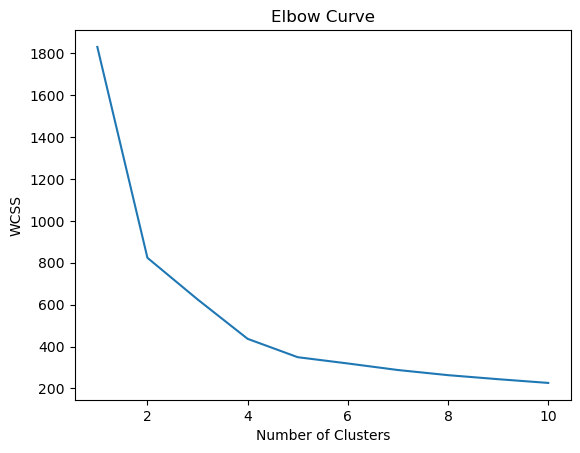

In [22]:
# elbow curve
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# from elbow curve it can be seen that n_clusters=2 will give best results

In [24]:
# building cluster algorithm
clusters_new=KMeans(2,random_state=42)
clusters_new.fit(airlines)
clusters_new.labels_

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1])

In [25]:
# assigning clusters to dataset
data['kmeans_clusterid']=clusters_new.labels_

In [27]:
data.head(6)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,kmeans_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,1


In [28]:
data.groupby('kmeans_clusterid').agg(['mean']).reset_index()

,kmeans_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.002701
1,1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.000000


In [30]:
data[data['kmeans_clusterid']==0]    # which data points are in cluster 0

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,kmeans_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0


## DBSCAN

In [39]:
dbscan=DBSCAN(eps=0.2,min_samples=4)
dbscan.fit(airlines)

DBSCAN(eps=0.2, min_samples=4)

In [40]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [41]:
x=pd.DataFrame(dbscan.labels_,columns=['DBSCAN_clusterid'])
x.head()

,DBSCAN_clusterid
0,0
1,0
2,0
3,0
4,1


In [42]:
pd.concat([data,x],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,kmeans_clusterid,DBSCAN_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0
